### Sampling Distributions

_Statistical Inference__: The process of making inferences on __population parameters__ using __sampling statistics__.


- Two facts on statistical inference: 
    - Population parameters are fixed and mostly unknown 
    - Sample statistics are known values for any given sample, but varies from sample to sample.
    
__sampling distribution__: The sampling distribution of a statistic is the probability distribution of that statistic.

Let's see some examples of sampling distributions

In [1]:
import numpy as np

In [2]:
## Let's take a sample of 100 observations from a population
## with normal distribution ~ N(0, 2)

# Note that X is just a sample that constists of 100 observations
X = np.random.normal(loc = 10, scale =2, size = 100)

# Find mean of this sample

x_bar = X.mean()

print('Mean statistic of the sample X is {}'.format(x_bar))

## Now let's try to understand the distribution of the sample means
## That is to say if we take many samples from the same population
## and calculate the statistic mean of this sample, what would be the 
## the distribution.


## Let's take 1000 different population from the same population

means_sample = []

for i in range(10000):
    
    X = np.random.normal(loc = 10, scale =2, size = 100)
    
    means_sample.append(X.mean())

Mean statistic of the sample X is 9.991612547851458


In [3]:
## let's check the distribution of the sampling distribution of the mean

import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(means_sample, norm_hist= True)
plt.xlabel('Sample means')
plt.ylabel('Probability densities')
plt.tight_layout()

The shape looks very 'normal'!

- Also it looks like the mean of the sampling distribution of the means is close to 10 which is true population mean.

- Recall that the population std was 2, what do you think about the std of the sampling distribution of the mean?

In [7]:
## let's find the standard deviation of the mean_list
## we hope that this might be a good estimate for the true standard deviation of the sampling dist. of the mean.
mean_sample_std = np.std(means_sample)
(
print('Note that the std of the mean_list {} not even close to the std of the population std 2'
      .format(mean_sample_std))
)

Note that the std of the mean_list 0.19945351877137063 not even close to the std of the population std 2


In fact, we know that Central limit theorem (in fact in this scenerio we don't even need CLT but in general we do. Don't worry for this if you don't see why you don't need CLT) tell us that mean_sample_std should be close to $\frac{\sigma}{\sqrt{n}}$ where $\sigma$ is the population standard deviation ($\sigma = 2$) and $n$ is the number of samples we used to create sampling distribution (n = 100). So according to CLT mean_sample should be close to $\frac{2}{\sqrt{100}} = \frac{2}{10} = 0.2 \approx 0.197$.

- Note that we just checked the normality from the graph let's be sure that we reallt have a normal distribution by using qq-plots and np library.


In [8]:
import statsmodels.api as sm

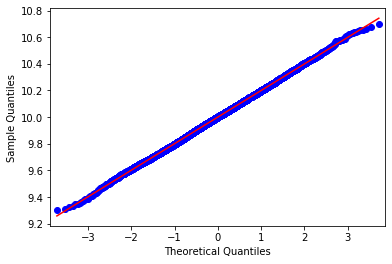

In [9]:
## statsmodel ask us to give an array so we convert list to an np.array
means = np.array(means_sample)

sm.qqplot(means, line = 'r')

plt.show()

In [10]:
from scipy.stats import stats
## Note that the null hypotheses is H_0 = the sample has a normal distribution.
## So you can interprett the pvalue of this method as the probability that this sample has 
## a normal distribution.
stats.normaltest(means)

NormaltestResult(statistic=0.9855546555821979, pvalue=0.6109272904504739)

In [11]:
## Let's take the samples from different populations with different distributions and check 
## whether the mean sampling distribution will still have normal distribution.

In [17]:
# Another test for normality
from scipy.stats import shapiro
# generate univariate observations
# normality test
stat, p = shapiro(means)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
## note the warning as you see as the sample increases the tests can detect even small departures from normality.
## please check the wikipedia page for more details

Statistics=1.000, p=0.286
Sample looks Gaussian (fail to reject H0)


//anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


For more details of Shapiro test please check:

[Scipy - documentation for Shapiro test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

[Shapiro–Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)


__Finally__ I want to get samples from a population with a distribution other than the normal distribution. With this I would like to emphasize that the sampling distribution of the mean is almost normal (with N($\mu$, $\frac{\sigma}{\sqrt{n}}$)) thanks to the CLT.

In [25]:
## consider the case where the samples come from a population with a chi-squared distribution


X = np.random.chisquare(df = 1, size = 100)

## mean of X with 1 degrees of freedom as above is 1 and the variance of a 
## chi_squared distribution with 1 (k) degrees of freedom is 2 (2k). So std = sqrt(2)
## Again for more information please check wikipedia

Note that $\chi^{2}$ distribution has only one parameter which is degrees of freedom. For more information about this distribution please check

[Chi-squared Distribution Wiki](https://en.wikipedia.org/wiki/Chi-squared_distribution)

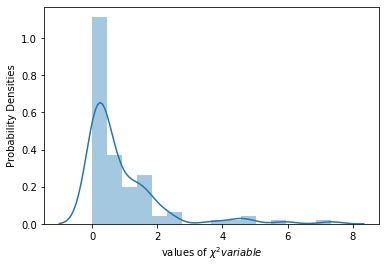

In [19]:
sns.distplot(X)
plt.xlabel('values of $\chi^{2} variable$')
plt.ylabel('Probability Densities')
plt.show()

For the explanation of the yaxis of the seaborn.distplot

please check:

[stackoverflow - seaborn.distplot yaxis](https://stackoverflow.com/questions/51666784/what-is-y-axis-in-seaborn-distplot)

In [20]:
means_sample = []

for i in range(10000):
    
    X = np.random.chisquare(df = 1, size = 100)
    
    means_sample.append(X.mean())

mean:0.9976810854466991 and std 0.1416502771849181


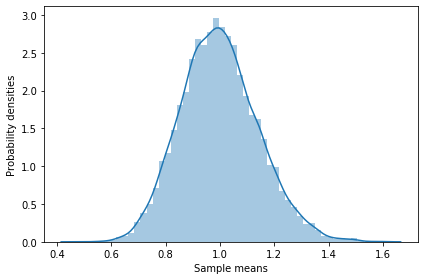

In [29]:
## let's check the distribution of the sampling distribution of the mean

import matplotlib.pyplot as plt
import seaborn as sns

means = np.array(means_sample)
print('mean:{} and std {}'.format(means.mean(), means.std()))
sns.distplot(means, norm_hist= True)
plt.xlabel('Sample means')
plt.ylabel('Probability densities')
plt.tight_layout()

Note again that this looks pretty much like normal distribution. Recall that the population mean was 1 and here the mean of means_sample is 0.99768 which is very close to the true population mean. CLT tells us that the standard deviation of this sampling distribution should be $\frac{\sqrt{2}}{\sqrt{100}} \approx 0.1414$ and we have found that the standard deviation 0.1416 which very close to the theoric value.

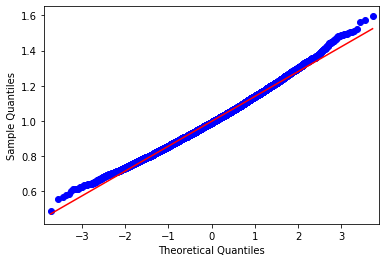

In [36]:
## let's use scipy to test normality

## statsmodel ask us to give an array so we convert list to an np.array

sm.qqplot(means, line = 'r')

plt.show()

In [35]:
# Another test for normality
from scipy.stats import shapiro
# generate univariate observations
# normality test
stat, p = shapiro(means)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
## note the warning as you see as the sample increases the tests can detect even small departures from normality.
## please check the wikipedia page for more details
## This is a great example of the need of effect size 

Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)


## Sampling Distribution of the Variance

Finally, I would like to discuss the sampling distribution of the variance. 

Let $X_{1}, \cdots , X_{n}$ be a random sample from a __normally__ distributed population with mean $\mu$ and variance $\sigma$. Then the quantity $\frac{(n-1)S^{2}}{\sigma^{2}}$ is a random variable whose distribution is described by a $\chi^{2}$ distribution with $n-1$ degrees of freedom, where $S^{2}$ is the usual sample estimate of the population variance 

$$ S^{2} = \frac{1}{n-1}\sum\limits_{i=1}^{n} \big( X_{i} - \bar{X}\big)^{2}$$

For more information please check the wikipedia:

[Chi-squared Distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution)


Let's try to simulate this:


In [37]:
## we get sample of size 5, from a normally distributed population with mu = 10, sigma = 3

S_squared = np.random.normal(loc = 10, scale = 3, size = 5)

In [62]:
## Let's get 1000 of such samples from the same population

S_squared_list = []

for i in range(10000):
    
    samples_from_normal = np.random.normal(loc = 10, scale =3, size = 5)
    
    S_squared_list.append(samples_from_normal.var(ddof = 1))

According to the theory $\frac{(n-1)S^{2}}{\sigma^{2}}$ should have $\chi^{2}$ distribution with 4 degrees of freedom. Note that in this case we stored $S^{2}$ in S_squared_list and $\sigma = 3$ and $n= 5$

In [63]:
n = 5
sigma = 3

In [64]:
new_S_squared = [((n-1)/(sigma**2))*S2 for S2 in S_squared_list]

In [65]:
## convert list to np.array so that working with them is easier
chi_squared = np.array(new_S_squared)

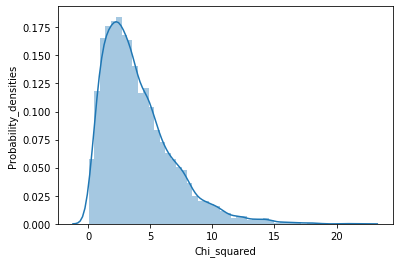

In [66]:
sns.distplot(chi_squared, kde =True)
plt.xlabel('Chi_squared')
plt.ylabel('Probability_densities')
plt.show()

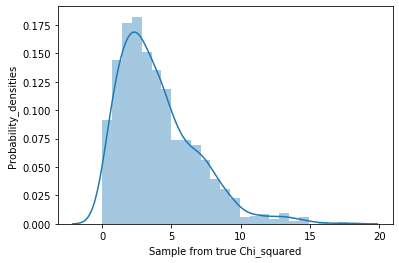

In [67]:
## Note that we get the above distribution from the sampling distribution of the variance 
## let's get another sample from a true chi_squared distribution to compare two results

true_chi = np.random.chisquare(df = 4, size = 1000 )

sns.distplot(true_chi)
plt.xlabel('Sample from true Chi_squared')
plt.ylabel('Probability_densities')
plt.show()

## Further Research

As we discussed in the class, we can get a F-distribution from the ratio of two random variables with $\chi^{2}$ distribution. So you can try to simulate this as we did above. Please let me know if you have any problems with this simulation.